In [1]:
import pandas as pd
from plotting_utils import *
from plotting_BCs import *
from clustering_utils import *

Load data and plot BIC curves

In [2]:
gmm_results = pd.read_pickle('Data/BCs/Dataframes/gmm_pcaColor_3Components_features.pkl')
data = pd.read_pickle('Data/BCs/Dataframes/control_data_features.pkl')
assert len(data) == len(gmm_results['Predictions'].iloc[0])
final_results = bayes_factor(gmm_results)

In [3]:
final_results

,Seed,Covariance type,Nb components,Predictions,Bayes Factor
0,3,diag,50,"[43, 14, 6, 43, 15, 43, 14, 43, 26, 43, 29, 43...","[29985.78266766743, 5611.6374368354445, 4444.2..."
1,18,full,24,"[5, 19, 3, 5, 3, 5, 19, 5, 19, 5, 19, 5, 19, 5...","[13279.249613384105, 8523.668552851916, 8812.7..."
2,0,tied,50,"[19, 27, 19, 12, 40, 19, 27, 19, 25, 19, 25, 1...","[5241.1215585875325, 1628.8122353616345, 2001...."
3,12,spherical,50,"[18, 6, 14, 43, 35, 18, 19, 14, 22, 18, 38, 18...","[15896.707365021808, 7557.250063034793, 4545.5..."


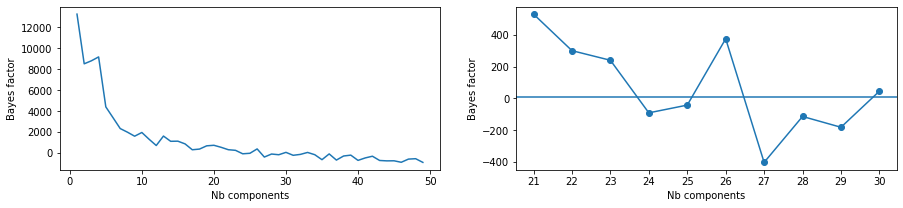

In [4]:
# Plot Bayes Factor

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[1])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[20:30], final_results['Bayes Factor'].iloc[1][20:30], 'o-')
plt.axhline(6)
plt.xticks(np.arange(21,31))
plt.show()

Permute cluster IDs

In [5]:
data['cluster ID (full)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'full'].to_numpy()[0]
data['cluster ID (full)'] = permute_clusterIDs(data, 'cluster ID (full)')

Plot full clustering

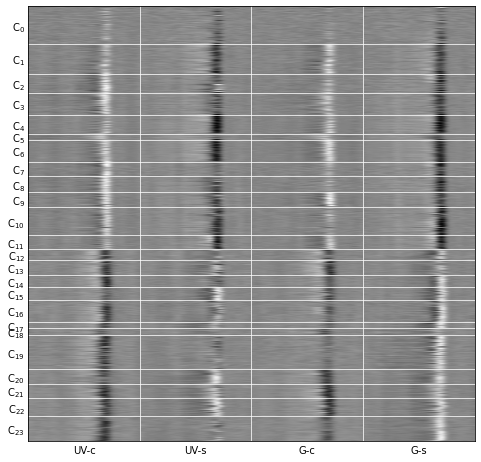

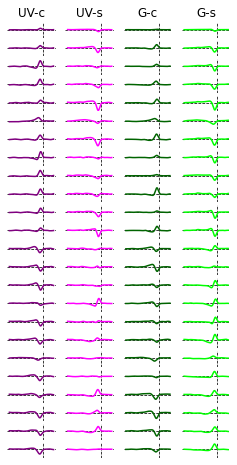

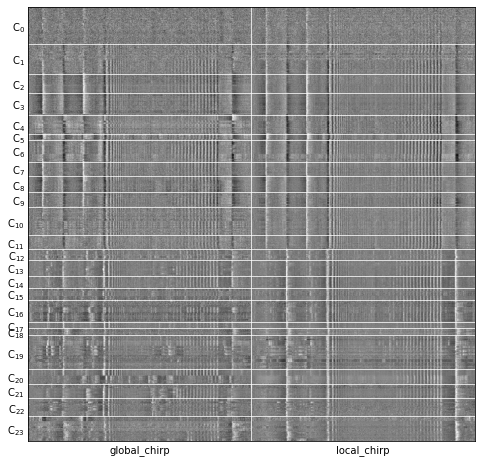

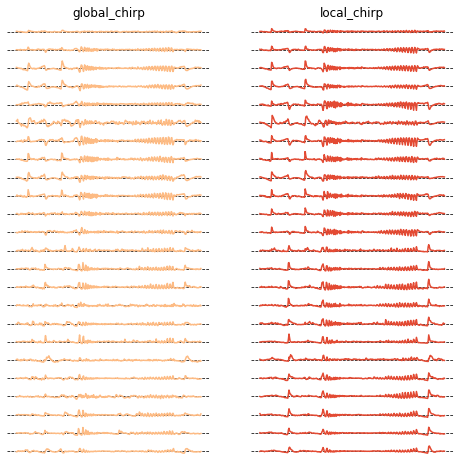

In [6]:
name = 'cluster ID (full)'

plot_Kernels(data, name)
plot_Chirp(data, name)

Crop flicker responses to same length

In [7]:
data['traces_uv_cropped'] = ''
data['traces_green_cropped'] = ''

for index, row in data.iterrows():

    data.at[index, 'traces_uv_cropped'] = row['traces_uv'][0:111983]
    data.at[index, 'traces_green_cropped'] = row['traces_green'][0:111983]

Average across ROIs

In [8]:
uv_flicker_responses = cluster_average(data, 'cluster ID (full)', 'traces_uv_cropped')
green_flicker_responses = cluster_average(data, 'cluster ID (full)', 'traces_green_cropped')
global_chirp = cluster_average(data, 'cluster ID (full)', 'global_chirp')
local_chirp = cluster_average(data, 'cluster ID (full)', 'local_chirp')

Plot clusters

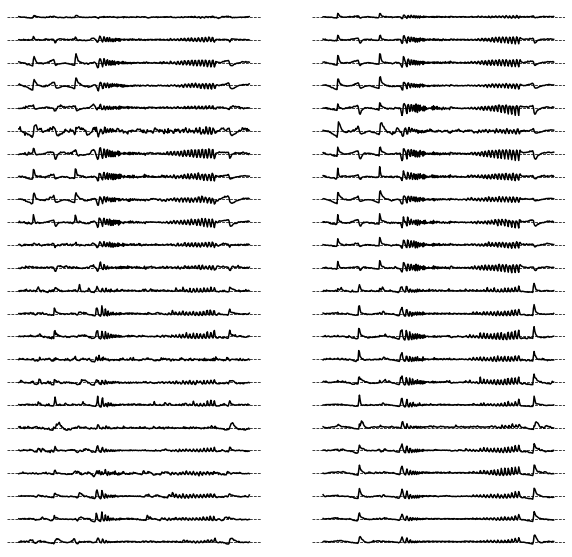

In [9]:
nb_clusters = local_chirp.shape[0]
fig, ax = plt.subplots(nb_clusters, 2, sharex='all', sharey='all', figsize=(10,10))
for current_cluster_ID in range(nb_clusters):
    my_ax = ax[current_cluster_ID, 0]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(global_chirp[current_cluster_ID,:], color = 'black', linewidth = 1.5)

    my_ax = ax[current_cluster_ID, 1]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(local_chirp[current_cluster_ID,:], color = 'black', linewidth = 1.5)
plt.show()

Define polarity

In [10]:
types = np.hstack((np.ones(12), # 12 ON types
                   (-1)*np.ones(12))) # 12 OFF types
print(types)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


Save arrays

In [11]:
#np.save('Data/BCs/Cluster Averages/uv_flicker_avrg.npy', uv_flicker_responses)
#np.save('Data/BCs/Cluster Averages/green_flicker_avrg.npy', green_flicker_responses)
#np.save('Data/BCs/Cluster Averages/global_chirp_avrg.npy', global_chirp)
#np.save('Data/BCs/Cluster Averages/local_chirp_avrg.npy', local_chirp)
#np.save('Data/BCs/Cluster Averages/types.npy', types)